<a href="https://colab.research.google.com/github/kotosham/projects/blob/main/13_feedforward_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

#from google.colab import drive

## Initialization

In [2]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epoch = 2
batch_size = 100

lr = 0.001


# Create data sets and data loaders

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 40639022.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1726268.22it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 12693062.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 8044986.81it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
examples = iter(train_loader)
samples, labels = next(examples)

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


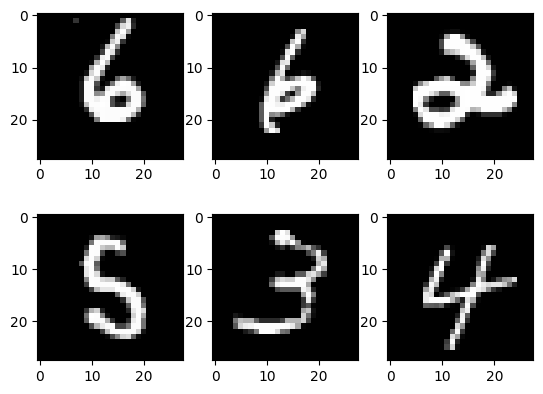

In [8]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap = 'gray')

# Neural network architecture

In [9]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out


In [10]:
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training

In [12]:
n_total_steps = len(train_loader)

for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
    #100, 1, 28, 28
    #100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i-1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epoch}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/2], Step [2/600], Loss: 2.2728
Epoch [1/2], Step [102/600], Loss: 0.4453
Epoch [1/2], Step [202/600], Loss: 0.4508
Epoch [1/2], Step [302/600], Loss: 0.3901
Epoch [1/2], Step [402/600], Loss: 0.1673
Epoch [1/2], Step [502/600], Loss: 0.2960
Epoch [2/2], Step [2/600], Loss: 0.2276
Epoch [2/2], Step [102/600], Loss: 0.2365
Epoch [2/2], Step [202/600], Loss: 0.1360
Epoch [2/2], Step [302/600], Loss: 0.2153
Epoch [2/2], Step [402/600], Loss: 0.2115
Epoch [2/2], Step [502/600], Loss: 0.2582


# Test

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0*n_correct/n_samples

  print(f'accuracy = {acc}')



accuracy = 95.19
